## **Analyzing Marketing Campaigns with pandas**

### **Data Overview & Preprocessing**
- The dataset is loaded from `marketing.csv`.
- Columns `date_served`, `date_subscribed`, and `date_canceled` were converted to datetime objects for accurate time-based analysis.

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

marketing = pd.read_csv('marketing.csv')
marketing['date_served'] = pd.to_datetime(marketing['date_served'], format='%m/%d/%y')
marketing['date_subscribed'] = pd.to_datetime(marketing['date_subscribed'], format='%m/%d/%y')
marketing['date_canceled'] = pd.to_datetime(marketing['date_canceled'], format='%m/%d/%y')
print(marketing.head())

# Define a function for calculating conversion rate
def conversion_rate(dataframe, column_names):
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    conversion_rate = round(column_conv/column_total*100,2)
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

      user_id date_served marketing_channel          variant converted  \
0  a100000029  2018-01-01         House Ads  personalization      True   
1  a100000030  2018-01-01         House Ads  personalization      True   
2  a100000031  2018-01-01         House Ads  personalization      True   
3  a100000032  2018-01-01         House Ads  personalization      True   
4  a100000033  2018-01-01         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years      2018-01-01   
1            English            English  19-24 years      2018-01-01   
2            English            English  24-30 years      2018-01-01   
3            English            English  30-36 years      2018-01-01   
4            English            English  36-45 years      2018-01-01   

  date_canceled subscribing_channel is_retained  
0           NaT           House Ads        True  
1           NaT       

### **User Engagement Analysis**
- A **daily active users** plot was generated to assess marketing reach over time.
- Understanding daily fluctuations helps to identify trends and evaluate the consistency of engagement.

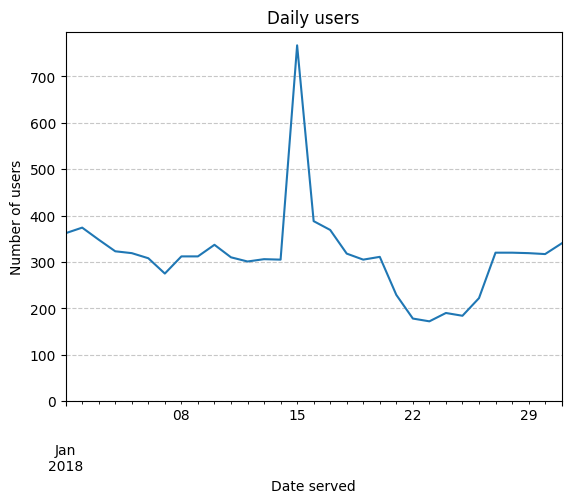

In [180]:
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

daily_users.plot()
plt.title('Daily users')
plt.ylabel('Number of users')
plt.xlabel('Date served')
plt.ylim(bottom=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

**Recommendations:**
- If engagement is uneven, it may indicate inconsistent marketing efforts.
- Identify key dates with engagement spikes and analyze corresponding marketing efforts.
- If engagement fluctuates significantly, consider optimizing campaign timing and messaging.

### **Conversion Rate**
**Definition:** Conversion rate is the percentage of users who saw marketing assets and subsequently became subscribers.


In [181]:
total = marketing['user_id'].nunique()
subscribers = marketing[marketing['converted']==True]['user_id'].nunique()
conversion_rat = subscribers/total
print("Conversion Rate = ", round(conversion_rat*100, 2), "%")


Conversion Rate =  13.89 %


**Insights:**
- A low conversion rate may indicate ineffective campaign messaging or targeting.
- Personalize campaign content based on user demographics and behavior.

### **Retention Rate**
**Definition:** Retention rate is the percentage of converted users who remained engaged after subscribing.


In [182]:
total_subscribers = marketing[marketing["converted"] == True]['user_id'].nunique()
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()
retention_rate = retained / total_subscribers
print("Retention Rate = ",round(retention_rate*100, 2), "%")

Retention Rate =  66.8 %


**Recommendations**
- Low retention rates suggest possible issues with user experience or perceived value.
- Implement user feedback loops to understand drop-off reasons.
- Introduce loyalty programs, reminders, or exclusive content to boost retention.

Language has significant impact on conversion rate. So daily conversion rate for each language shall be plotted to dive into deeper analysis

### **Analyze Daily Conversion Rate**</br>
To check if the conversion rate varies based on when users saw an ad, the conversion rate for each day is calculated and plotted to identify any trends or patterns over time.

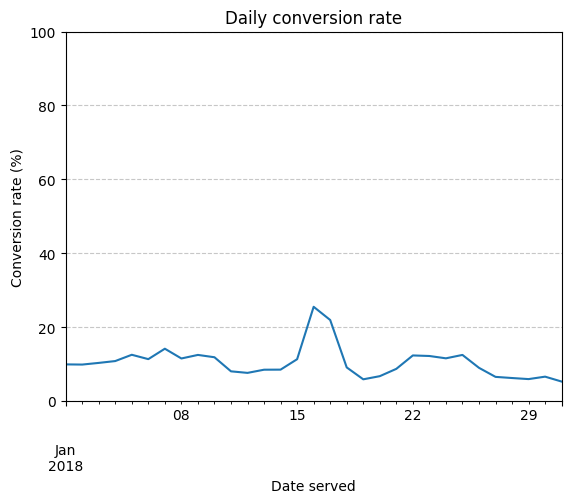

In [183]:
daily_conversion_rate = conversion_rate(marketing, 'date_served')

daily_conversion_rate.plot()
plt.title('Daily conversion rate')
plt.ylabel('Conversion rate (%)')
plt.xlabel('Date served')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.ylim(plt.ylim([0, 100]))
plt.show()

**Recommendation**: Conversion rate is high during the mid of the month during which more and updated ad campaign shall be introduced.

### **Marketing channels across age groups** </br>
To determine if marketing channels are reaching all age demographics equally or if certain channels are more effective at targeting specific age groups - by visualizing the distribution of users across marketing channels and age groups.

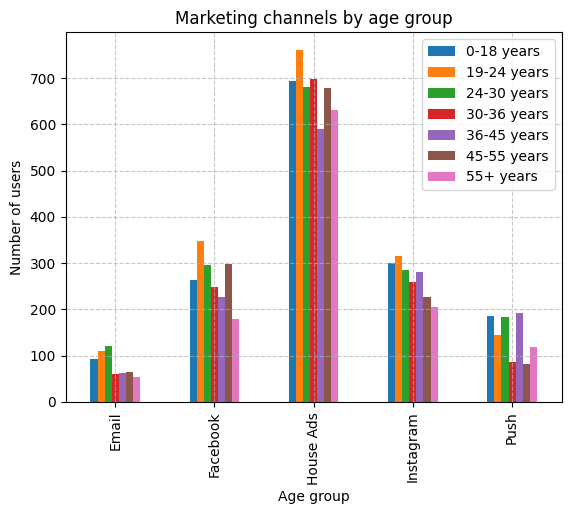

In [184]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age group')
plt.ylabel('Number of users')
plt.legend(labels = channel_age_df.columns.values, loc = 'upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### **Retention rate by marketing channel**
</br>To find which channel had the best retention rate from the campaign. It is important to identify how each marketing channel is performing because this will affect company strategy going forward. If one channel is outperforming others, it might signal the channel merits further investment.

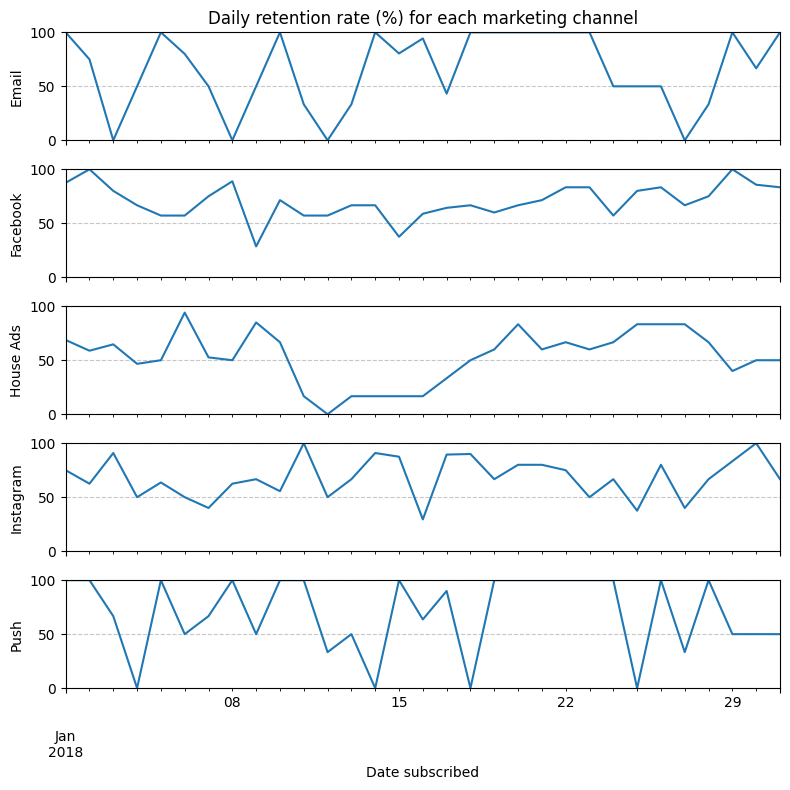

In [185]:
retention_total = marketing.groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()
retention_subs = marketing[marketing['is_retained']==True].groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()
retention_rate = round(retention_subs/retention_total*100,2)
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1)).fillna(0)

fig, axes = plt.subplots(len(retention_rate_df.columns), 1, figsize=(8, 8), sharex=True)
for i, channel in enumerate(retention_rate_df.columns):
    retention_rate_df[channel].plot(ax=axes[i])
    axes[i].set_xlabel('Date subscribed')
    axes[i].set_ylabel(f'{channel}')  
    axes[i].set_ylim([0, 100])
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
axes[0].set_title(f'Daily retention rate (%) for each marketing channel')
plt.tight_layout()
plt.show()

### **Conversion rate plots for each age group** 
</br> Calculate and visualize the conversion rate for each age group over time. 

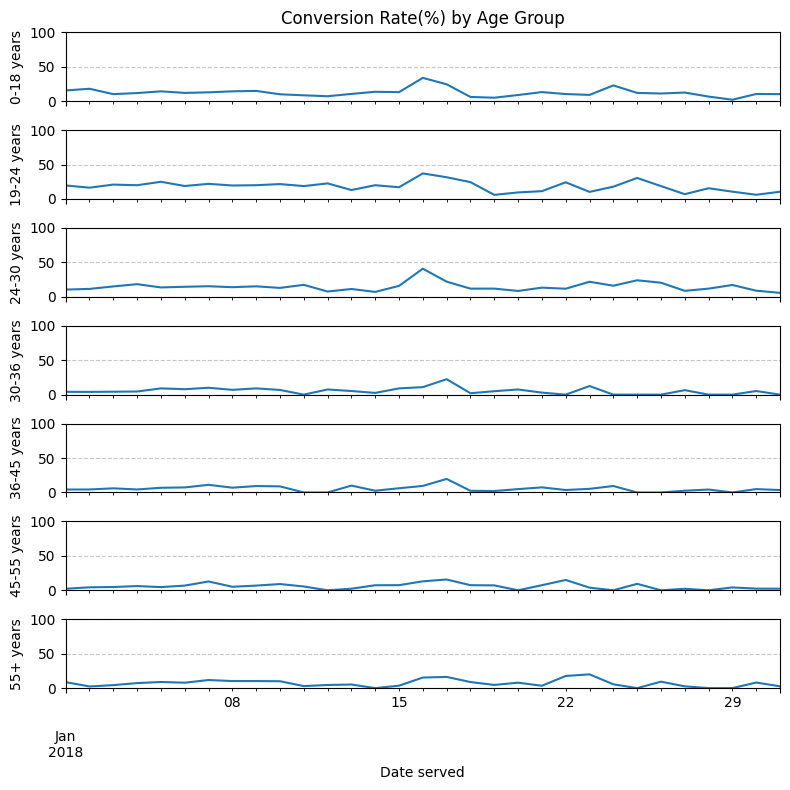

In [186]:
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

fig, axes = plt.subplots(len(age_group_df.columns), 1, figsize=(8, 8), sharex=True)

for i, age_group in enumerate(age_group_df.columns):
    age_group_df[age_group].plot(ax=axes[i])
    axes[i].set_ylabel(f'{age_group}')
    axes[i].set_xlabel('Date served')
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
    axes[i].set_ylim([0, 100])
axes[0].set_title('Conversion Rate(%) by Age Group')
plt.tight_layout()
plt.show()

### **Conversion rate for each marketing channel by date served**

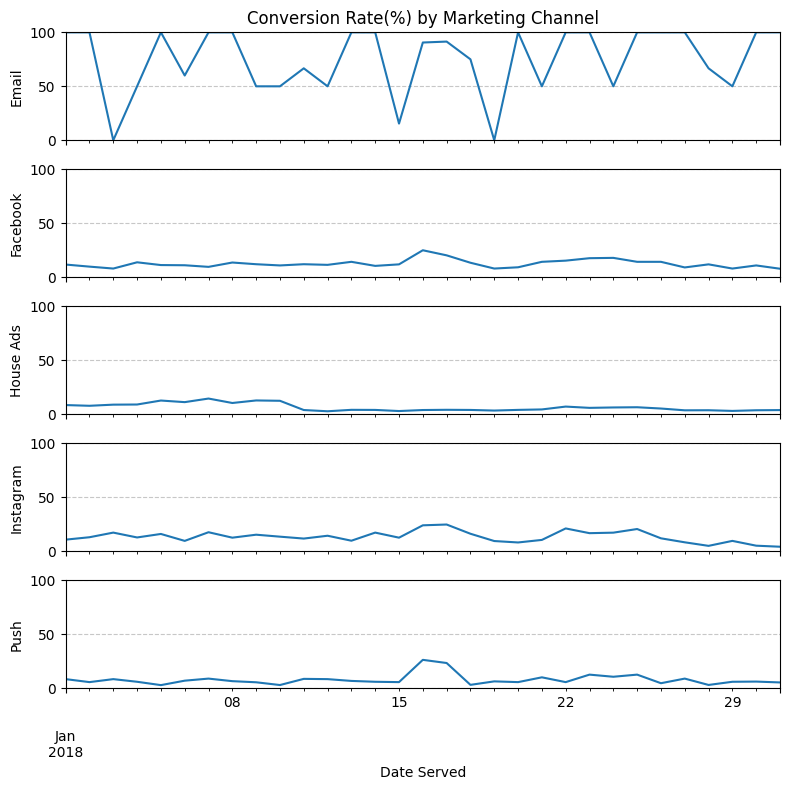

In [187]:
daily_conv_channel = conversion_rate(marketing,['date_served','marketing_channel'])
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

fig, axes = plt.subplots(len(daily_conv_channel.columns), 1, sharex=True, figsize=(8, 8))
for i, channel in enumerate(daily_conv_channel.columns):
    daily_conv_channel[channel].plot(ax=axes[i])
    axes[i].set_ylabel(f'{channel}')
    axes[i]
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
    axes[i].set_ylim([0, 100])
axes[0].set_title('Conversion Rate(%) by Marketing Channel')
axes[-1].set_xlabel('Date Served')
plt.tight_layout()
plt.show()

### **Influence of day of week on conversion rate**
</br> To check whether users are more likely to convert on weekends compared with weekdays by visualizing conversion rate of different channels.

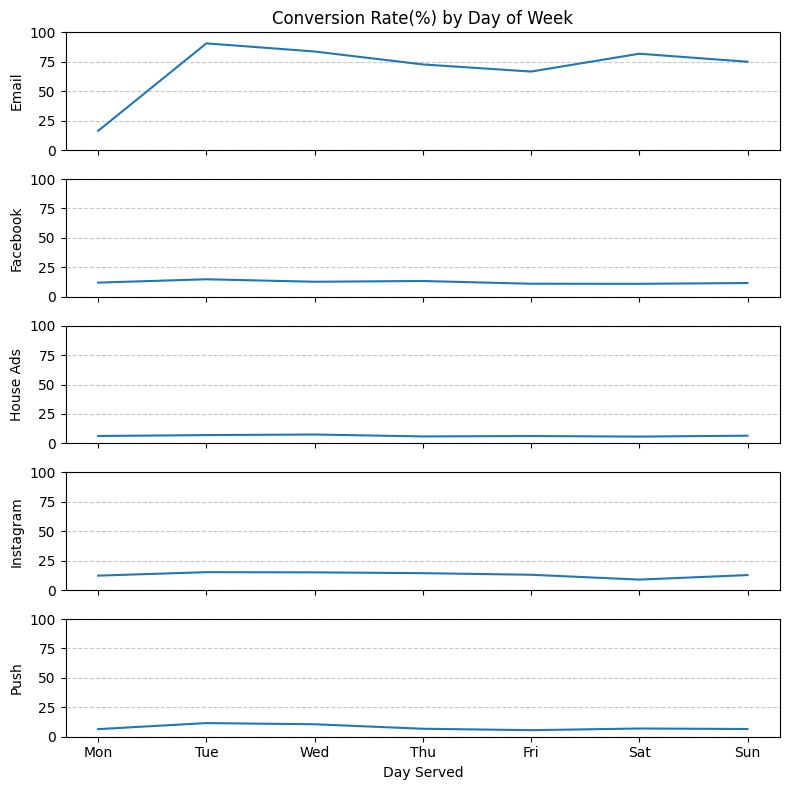

In [188]:
marketing['DoW_served'] =marketing['date_served'].dt.dayofweek
DoW_conversion = conversion_rate(marketing, ['DoW_served','marketing_channel'] )
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

fig, axes = plt.subplots(len(DoW_df.columns), 1, sharex=True, figsize=(8, 8))
for i, channel in enumerate(DoW_df.columns):
    DoW_df[channel].plot(ax=axes[i])
    axes[i].set_ylabel(f'{channel}')
    axes[i]
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
    axes[i].set_ylim([0, 100])
axes[0].set_title('Conversion Rate(%) by Day of Week')
axes[-1].set_xlabel('Day Served')
axes[-1].set_xticks(range(7))
axes[-1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()


### **Language Impact on Conversion**

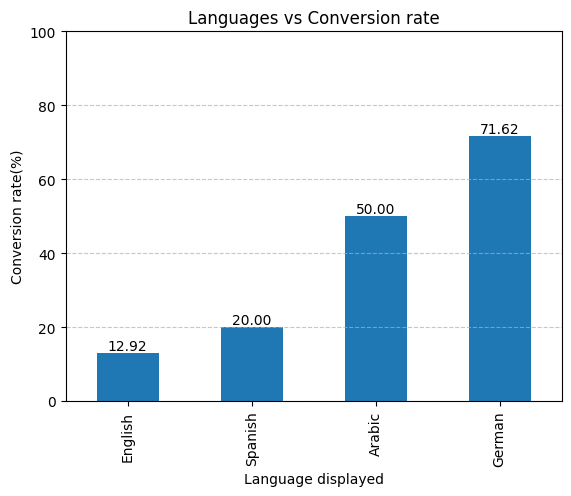

In [189]:
language_conversion_rate = conversion_rate(marketing,'language_displayed')

ax=language_conversion_rate.sort_values().plot(kind='bar')
for i, value in enumerate(language_conversion_rate.sort_values()):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.xlabel('Language displayed')
plt.ylabel('Conversion rate(%)')
plt.title('Languages vs Conversion rate')
plt.ylim(plt.ylim([0, 100]))
plt.grid(True, axis='y',linestyle='--', alpha=0.7)
plt.show()

### **Daily Language Conversion Rate**
</br> Language has significant impact on conversion rate. So daily conversion rate for each language shall be plotted to dive into deeper analysis.

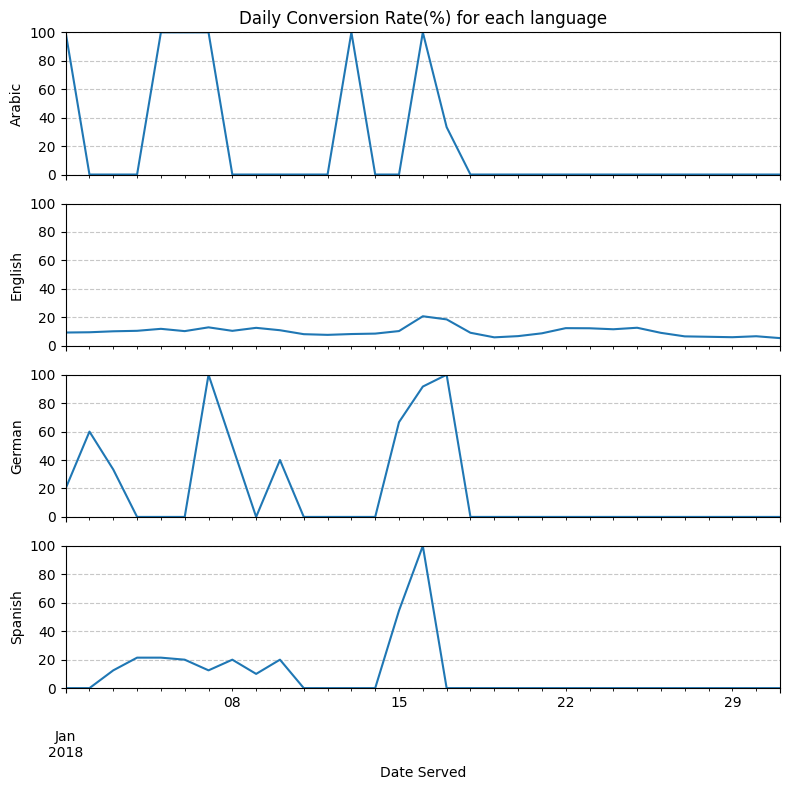

In [190]:
conv_lang = conversion_rate(marketing,['date_served','language_displayed'])
conv_lang_df = pd.DataFrame(conv_lang.unstack(level=1)).fillna(0)

fig, axes = plt.subplots(len(conv_lang_df.columns), 1, sharex=True, figsize=(8, 8))
for i, lang in enumerate(conv_lang_df.columns):
    conv_lang_df[lang].plot(ax=axes[i])
    axes[i].set_ylabel(f'{lang}')
    axes[i]
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
    axes[i].set_ylim([0, 100])
axes[0].set_title('Daily Conversion Rate(%) for each language')
axes[-1].set_xlabel('Date Served')
plt.tight_layout()
plt.show()


### **Language Preferred vs language served for users**
Check whether users see ads in the correct language - calculate what percentage of users were being served ads in the right language and plot the results.

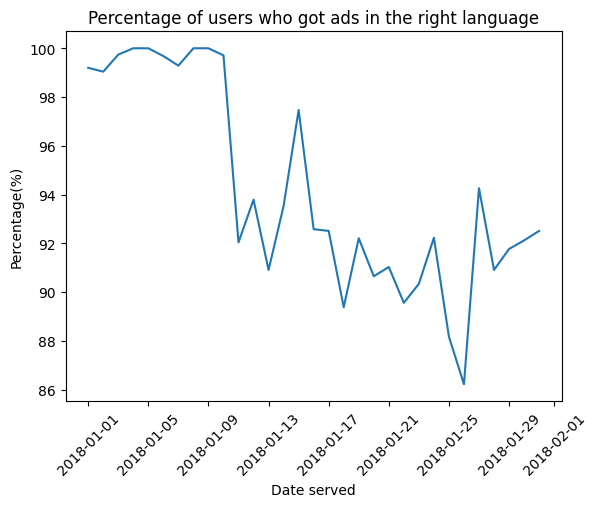

In [191]:
marketing['is_correct_lang'] = np.where(marketing['language_displayed'] == marketing['language_preferred'], 'Yes', 'No')
language_check = marketing.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)
language_check_df['pct'] = round((language_check_df['Yes'] / language_check_df.sum(axis=1))*100,2)
plt.plot(language_check_df.index, language_check_df['pct'])
plt.xlabel('Date served')
plt.xticks(rotation=45)
plt.ylabel('Percentage(%)')
plt.title("Percentage of users who got ads in the right language")
plt.show()